# Sentinel-1 InSAR processing

This notebook provides an example to compute the geocoded InSAR coherence and the geocoded (flattened + terrain corrected + multilooked + filtered) interferogram on a user defined InSAR pairs

In [1]:
import openeo

import rasterio
from rasterio.plot import show

import matplotlib.pyplot as plt

Create a datacube with the geocoded InSAR coherence and interferograms for a list of InSAR pairs

In [2]:
url = "https://openeo.dataspace.copernicus.eu"
connection = openeo.connect(url).authenticate_oidc()

datacube = connection.datacube_from_process(
    process_id="insar_coherence",
    InSAR_pairs=[
        ["2024-08-09", "2024-08-21"],
        ["2024-08-21", "2024-09-02"]
    ],
    burst_id=249435,
    polarization="vv",
    sub_swath="IW2",
    coherence_window_rg=20,
    coherence_window_az=4,
)

datacube = datacube.save_result(format='GTiff')

Authenticated using refresh token.


In [3]:
job = datacube.create_job(title='InSAR_coherence')
job.start_and_wait()
job.get_results().download_files()

0:00:00 Job 'j-250925115331466eb94428ab7902f1d1': send 'start'
0:00:14 Job 'j-250925115331466eb94428ab7902f1d1': created (progress 0%)
0:00:19 Job 'j-250925115331466eb94428ab7902f1d1': created (progress 0%)
0:00:25 Job 'j-250925115331466eb94428ab7902f1d1': created (progress 0%)
0:00:33 Job 'j-250925115331466eb94428ab7902f1d1': created (progress 0%)
0:00:43 Job 'j-250925115331466eb94428ab7902f1d1': queued (progress 0%)
0:00:56 Job 'j-250925115331466eb94428ab7902f1d1': queued (progress 0%)
0:01:11 Job 'j-250925115331466eb94428ab7902f1d1': queued (progress 0%)
0:01:31 Job 'j-250925115331466eb94428ab7902f1d1': queued (progress 0%)
0:01:55 Job 'j-250925115331466eb94428ab7902f1d1': running (progress N/A)
0:02:25 Job 'j-250925115331466eb94428ab7902f1d1': running (progress N/A)
0:03:02 Job 'j-250925115331466eb94428ab7902f1d1': running (progress N/A)
0:03:49 Job 'j-250925115331466eb94428ab7902f1d1': running (progress N/A)
0:04:47 Job 'j-250925115331466eb94428ab7902f1d1': running (progress N/A)


[PosixPath('/home/mcallegari/GitHub/s1-workflows/notebooks/DEMO_MTR/s1_coherence/openEO_2024-08-09Z.tif'),
 PosixPath('/home/mcallegari/GitHub/s1-workflows/notebooks/DEMO_MTR/s1_coherence/openEO_2024-08-21Z.tif'),
 PosixPath('/home/mcallegari/GitHub/s1-workflows/notebooks/DEMO_MTR/s1_coherence/job-results.json')]

# Visualization of the results

## 1) Visualization in the Jupyter notebook

Visualize the band names

In [4]:
with rasterio.open('openEO_2024-08-21Z.tif') as src:
    print(src.descriptions)

('coh_VV',)


Visualize the InSAR coherence

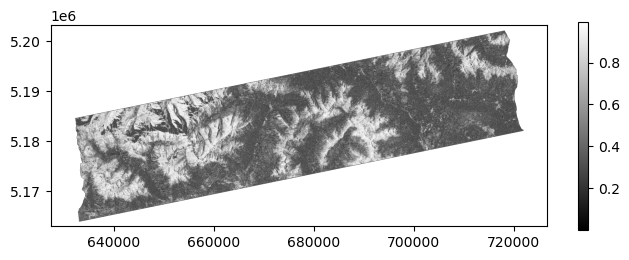

In [5]:
with rasterio.open('openEO_2024-08-21Z.tif') as src:
    fig, ax = plt.subplots(figsize=(8, 6))
    im = show(src.read(1), transform=src.transform, cmap='gray', ax=ax)
    cbar = fig.colorbar(im.get_images()[0], ax=ax, orientation="vertical", shrink=0.45)